# Revue des statistiques descriptives

Dans cette deuxième partie du lab, nous allons continuer à travailler avec les données que nous avons nettoyées dans la première partie.  
Veillez à continuer d’écrire un code propre et à bien commenter votre travail !

Tout d’abord, importons nos bibliothèques et les données que nous avons sauvegardées.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diamonds_clean.csv')
df = df.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1)

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_numeric,color_numeric
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0


Maintenant que nous avons nettoyé nos données, nous pouvons passer à une analyse exploratoire.  
Nous allons analyser les caractéristiques qui influencent le plus le prix.

Commençons par examiner comment les caractéristiques d’un diamant (et **surtout le prix, puisque c’est notre point d’intérêt**) varient en fonction de sa couleur.  
Rappelez-vous que vous pouvez utiliser la méthode `groupby()` de pandas.

**À l’aide de la méthode `describe()`, observez le jeu de données en portant une attention particulière à la variabilité. Commentez ce que vous observez.**


In [4]:
#your code here
df.describe().T.style.background_gradient(cmap='Blues')


,count,mean,std,min,25%,50%,75%,max
carat,53932.000000,0.797879,0.473986,0.200000,0.400000,0.700000,1.040000,5.010000
depth,53932.000000,61.749336,1.432514,43.000000,61.000000,61.800000,62.500000,79.000000
table,53932.000000,57.457029,2.234064,43.000000,56.000000,57.000000,59.000000,95.000000
price,53932.000000,3932.136079,3988.734835,326.000000,949.750000,2401.000000,5324.000000,18823.000000
x,53932.000000,5.732007,1.119670,3.730000,4.710000,5.700000,6.540000,10.740000
y,53932.000000,5.735254,1.140343,3.680000,4.720000,5.710000,6.540000,58.900000
z,53932.000000,3.819028,14.345621,1.070000,2.910000,3.530000,4.040000,1972.855500
clarity_numeric,53932.000000,3.051101,1.647109,0.000000,2.000000,3.000000,4.000000,7.000000
color_numeric,53932.000000,3.405789,1.701165,0.000000,2.000000,3.000000,5.000000,6.000000


In [6]:
#your comments here

## ✔️ Passons maintenant à l’analyse de chaque variable séparément.

**Avant de commencer, selon vous, quelles variables auront le plus d’impact sur le prix, et pourquoi ? Vous comparerez vos hypothèses avec vos résultats.**


In [5]:
#your hypotheses here

## 1️⃣ La colonne `color`

Commençons par examiner la colonne `color`.

**Pour chaque couleur différente, calculez la moyenne de chaque colonne numérique.  
Vous devez obtenir une matrice avec chaque couleur en ligne et les colonnes `carat`, `clarity`, etc. comme colonnes.**


In [7]:
#your code here
# Grouper par couleur et calculer la moyenne sur toutes les autres colonnes
color_means = df.groupby('color').mean(numeric_only=True)

# Afficher le tableau
color_means.head()


,carat,depth,table,price,x,y,z,clarity_numeric,color_numeric
color,,,,,,,,,
D,0.657715,61.698066,57.404355,3168.106436,5.417851,5.421928,3.434893,2.691025,6.0
E,0.657867,61.662090,57.491201,3076.752475,5.411580,5.419029,3.369835,2.969889,5.0
F,0.736509,61.694087,57.433148,3725.091938,5.616727,5.620529,3.505782,3.134605,4.0
G,0.771088,61.757449,57.288060,3998.145173,5.678549,5.681198,3.783195,3.463419,3.0
H,0.911627,61.836557,57.518176,4484.958805,5.984776,5.986256,4.387504,2.933871,2.0


**Que voyez vous? Accorder une attention spéciale à la relation entre price et color.**

In [8]:
#your thoughts here
# Grouper par color et calculer la moyenne numérique
color_means = df.groupby('color').mean(numeric_only=True)

# Vérif
#color_means.head()

# Calculer la matrice de corrélation
correlation = color_means.corr()

# Afficher la corrélation entre price et les autres variables
print(correlation['price'])


carat              0.980319
depth              0.965733
table              0.698937
price              1.000000
x                  0.983188
y                  0.982907
z                  0.942169
clarity_numeric   -0.083515
color_numeric     -0.982135
Name: price, dtype: float64


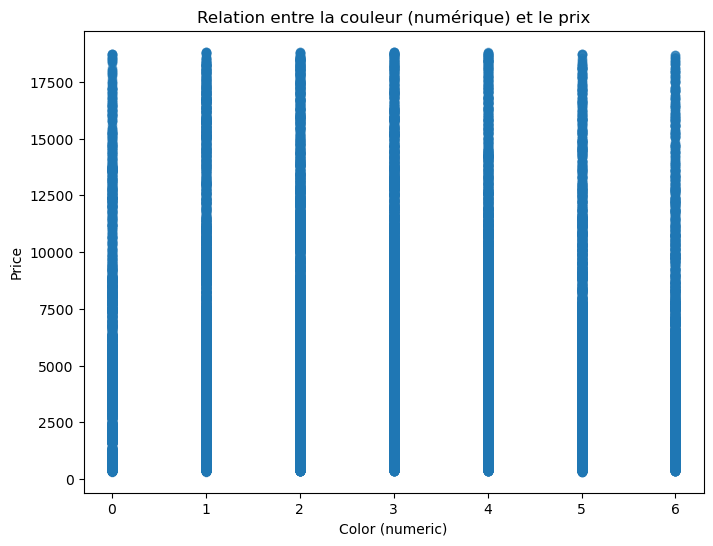

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(df['color_numeric'], df['price'], alpha=0.5)
plt.xlabel('Color (numeric)')
plt.ylabel('Price')
plt.title('Relation entre la couleur (numérique) et le prix')
plt.show()

Pour interpréter :

- Corrélation positive proche de +1 → forte relation positive.

- Corrélation négative proche de -1 → forte relation inverse.

- Corrélation proche de 0 → pas de lien linéaire clair

**un boxplot pour voir la distribution du prix pour chaque color_numeric**

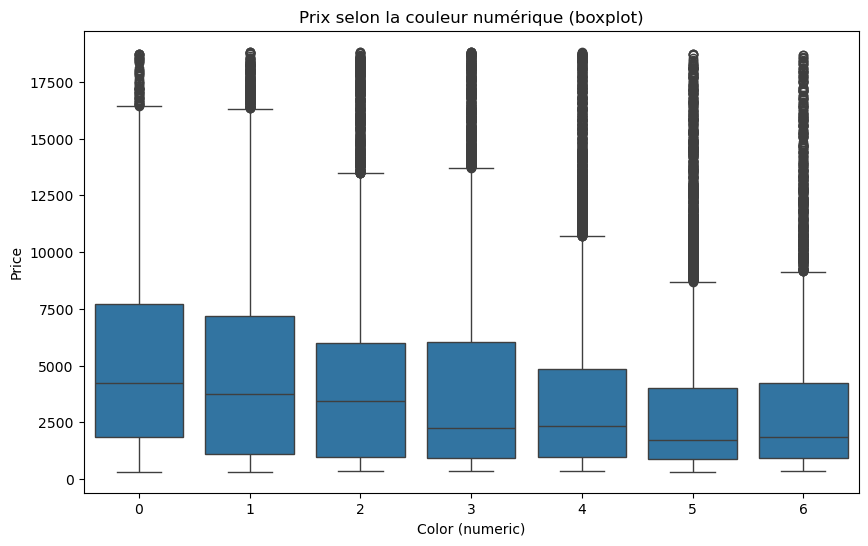

In [10]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='color_numeric', y='price', data=df)
plt.xlabel('Color (numeric)')
plt.ylabel('Price')
plt.title('Prix selon la couleur numérique (boxplot)')
plt.show()

## 🔍 Approfondissons la variable `color`

Allons plus loin avec la variable `color`. Nous allons tracer la **distribution de fréquence** des couleurs des diamants dans notre jeu de données.

**Tracez la distribution et analysez-la.  
Rappelez-vous que vous pouvez utiliser la méthode `plot()` de pandas.**


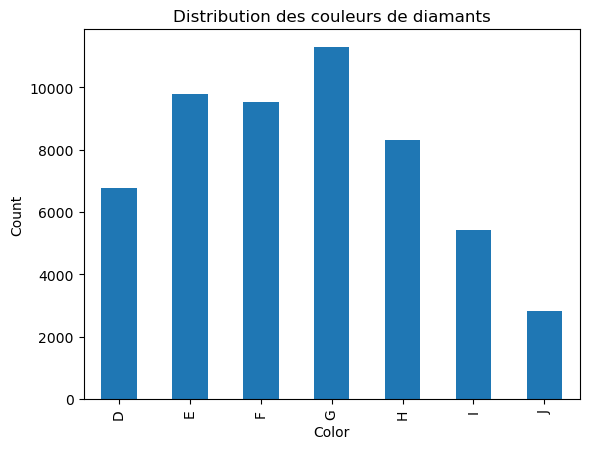

In [11]:
#your code here
# Compter la fréquence de chaque couleur
color_counts = df['color'].value_counts().sort_index()

# Tracer la distribution avec pandas
color_counts.plot(kind='bar', title='Distribution des couleurs de diamants')

# Afficher le graphique
import matplotlib.pyplot as plt
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()




In [10]:
#your comments here

## 2.Le `carat` colonne

## Vérifions la variable `carat` (poids)

Vérifions la variable `carat` (poids), car cela pourrait aussi être un facteur potentiel influençant le prix.

**Trouvez la moyenne de chaque colonne pour chaque valeur de `carat` en utilisant la méthode `groupby`.  
Commentez ensuite vos résultats.**


In [12]:
#your code here
#df.groupby(['carat'])

# Grouper par color et calculer la moyenne numérique
carat_means = df.groupby('carat').mean(numeric_only=True)

# Vérif
carat_means.head()

,depth,table,price,x,y,z,clarity_numeric,color_numeric
carat,,,,,,,,
0.20,61.100000,59.333333,365.166667,3.786667,3.753333,2.303333,2.833333,5.166667
0.21,60.511111,58.444444,380.222222,3.874444,3.837778,2.332222,2.666667,5.444444
0.22,61.620000,60.400000,391.400000,3.898000,3.848000,2.386000,2.600000,4.800000
0.23,61.426621,58.034130,486.143345,3.946382,3.973379,2.431468,4.901024,4.518771
0.24,61.599213,57.488189,505.185039,3.990157,4.019331,2.465591,4.972441,4.185039


In [ ]:
#your comments
#plus le carat augmente plus le prix monte

## 📊 Tracer un histogramme de la colonne `carat`

**Tracez un histogramme de la colonne `carat` en utilisant la méthode `plot` de pandas (consultez la documentation pour voir comment faire facilement).  
Que remarquez-vous ?**


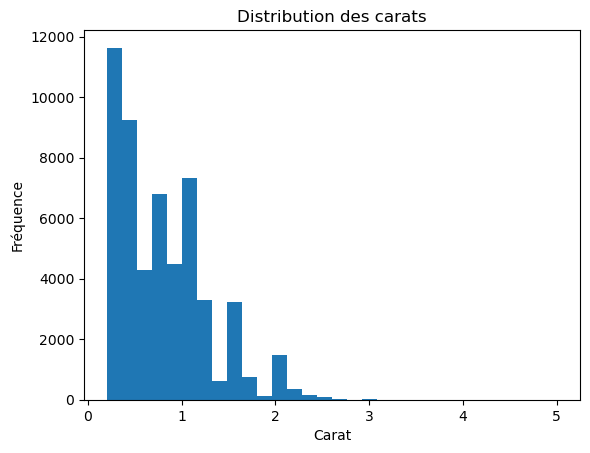

In [13]:
#your code here
df['carat'].plot(kind='hist', bins=30, title='Distribution des carats')

import matplotlib.pyplot as plt
plt.xlabel('Carat')
plt.ylabel('Fréquence')
plt.show()

## 3️⃣ Les colonnes `table` et `clarity`

Enfin, examinons la colonne `table`.

**Trouvez la moyenne de chaque colonne pour chaque valeur de `table` en utilisant la méthode `groupby`.  
Commentez ensuite vos résultats.**


In [14]:
#your code here
# Grouper par la colonne 'table' et calculer la moyenne de chaque colonne numérique
table_means = df.groupby('table').mean(numeric_only=True)

# Afficher le résultat
table_means.head()


,carat,depth,price,x,y,z,clarity_numeric,color_numeric
table,,,,,,,,
43.0,1.04,62.90,4997.0,6.450,6.410,4.040,4.0,1.0
44.0,0.29,62.80,474.0,4.200,4.240,2.650,4.0,5.0
49.0,0.65,64.25,2290.5,5.355,5.320,3.425,3.0,3.0
50.0,1.51,61.50,8995.5,7.380,7.295,4.510,2.0,3.0
50.1,0.94,66.00,3353.0,6.130,6.170,4.060,1.0,2.0


In [ ]:
#your comments here


**Finally, do the same with the `clarity` column.**

In [15]:
#your code here
calarity_means = df.groupby('clarity_numeric').mean(numeric_only=True)

# Afficher le résultat
calarity_means.head()

,carat,depth,table,price,x,y,z,color_numeric
clarity_numeric,,,,,,,,
0,1.283846,62.734278,58.303779,3924.168691,6.761093,6.709379,14.390482,2.968961
1,1.077602,61.771567,57.926823,5062.267356,6.404157,6.399890,4.463954,3.469967
2,0.850482,61.853042,57.662541,3996.001148,5.888383,5.888256,3.718910,3.448450
3,0.763850,61.724249,57.418040,3924.166204,5.658633,5.659782,3.614703,3.494370
4,0.727108,61.667968,57.313966,3839.144308,5.572860,5.582512,3.476379,3.161812


In [21]:
#your comments here

## ✅ Conclusion

**Après avoir analysé vos résultats, quelles variables pensez-vous maintenant avoir le plus d’impact sur le prix ?  
Vos hypothèses de départ correspondent-elles à vos résultats finaux ?  
Rédigez un petit bilan.**


carat              0.921610
color_numeric     -0.172569
clarity_numeric   -0.146886
price              1.000000
Name: price, dtype: float64


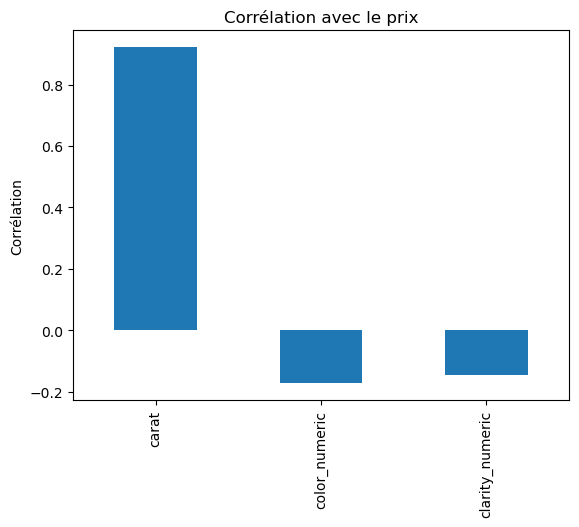

In [16]:
#your thoughts here



# Créer un sous-DataFrame 
subset = df[['carat', 'color_numeric', 'clarity_numeric', 'price']]

# Calculer la matrice de corrélation
correlation = subset.corr()

# Afficher la corrélation de chaque variable avec le prix
print(correlation['price'])

# 📊 Visualiser pour comparer
correlation['price'].drop('price').plot(kind='bar', title='Corrélation avec le prix')
plt.ylabel('Corrélation')
plt.show()

## 🎁 Bonus : Analyse plus poussée avec des graphiques et des corrélations

Pour aller plus loin, nous allons utiliser la méthode `pairplot` de la bibliothèque **Seaborn**.  
Cette méthode trace un **nuage de points** pour chaque paire de variables et, sur la diagonale, la distribution de chaque variable.

💡 Attention : si vous avez beaucoup de variables, cela peut prendre du temps !


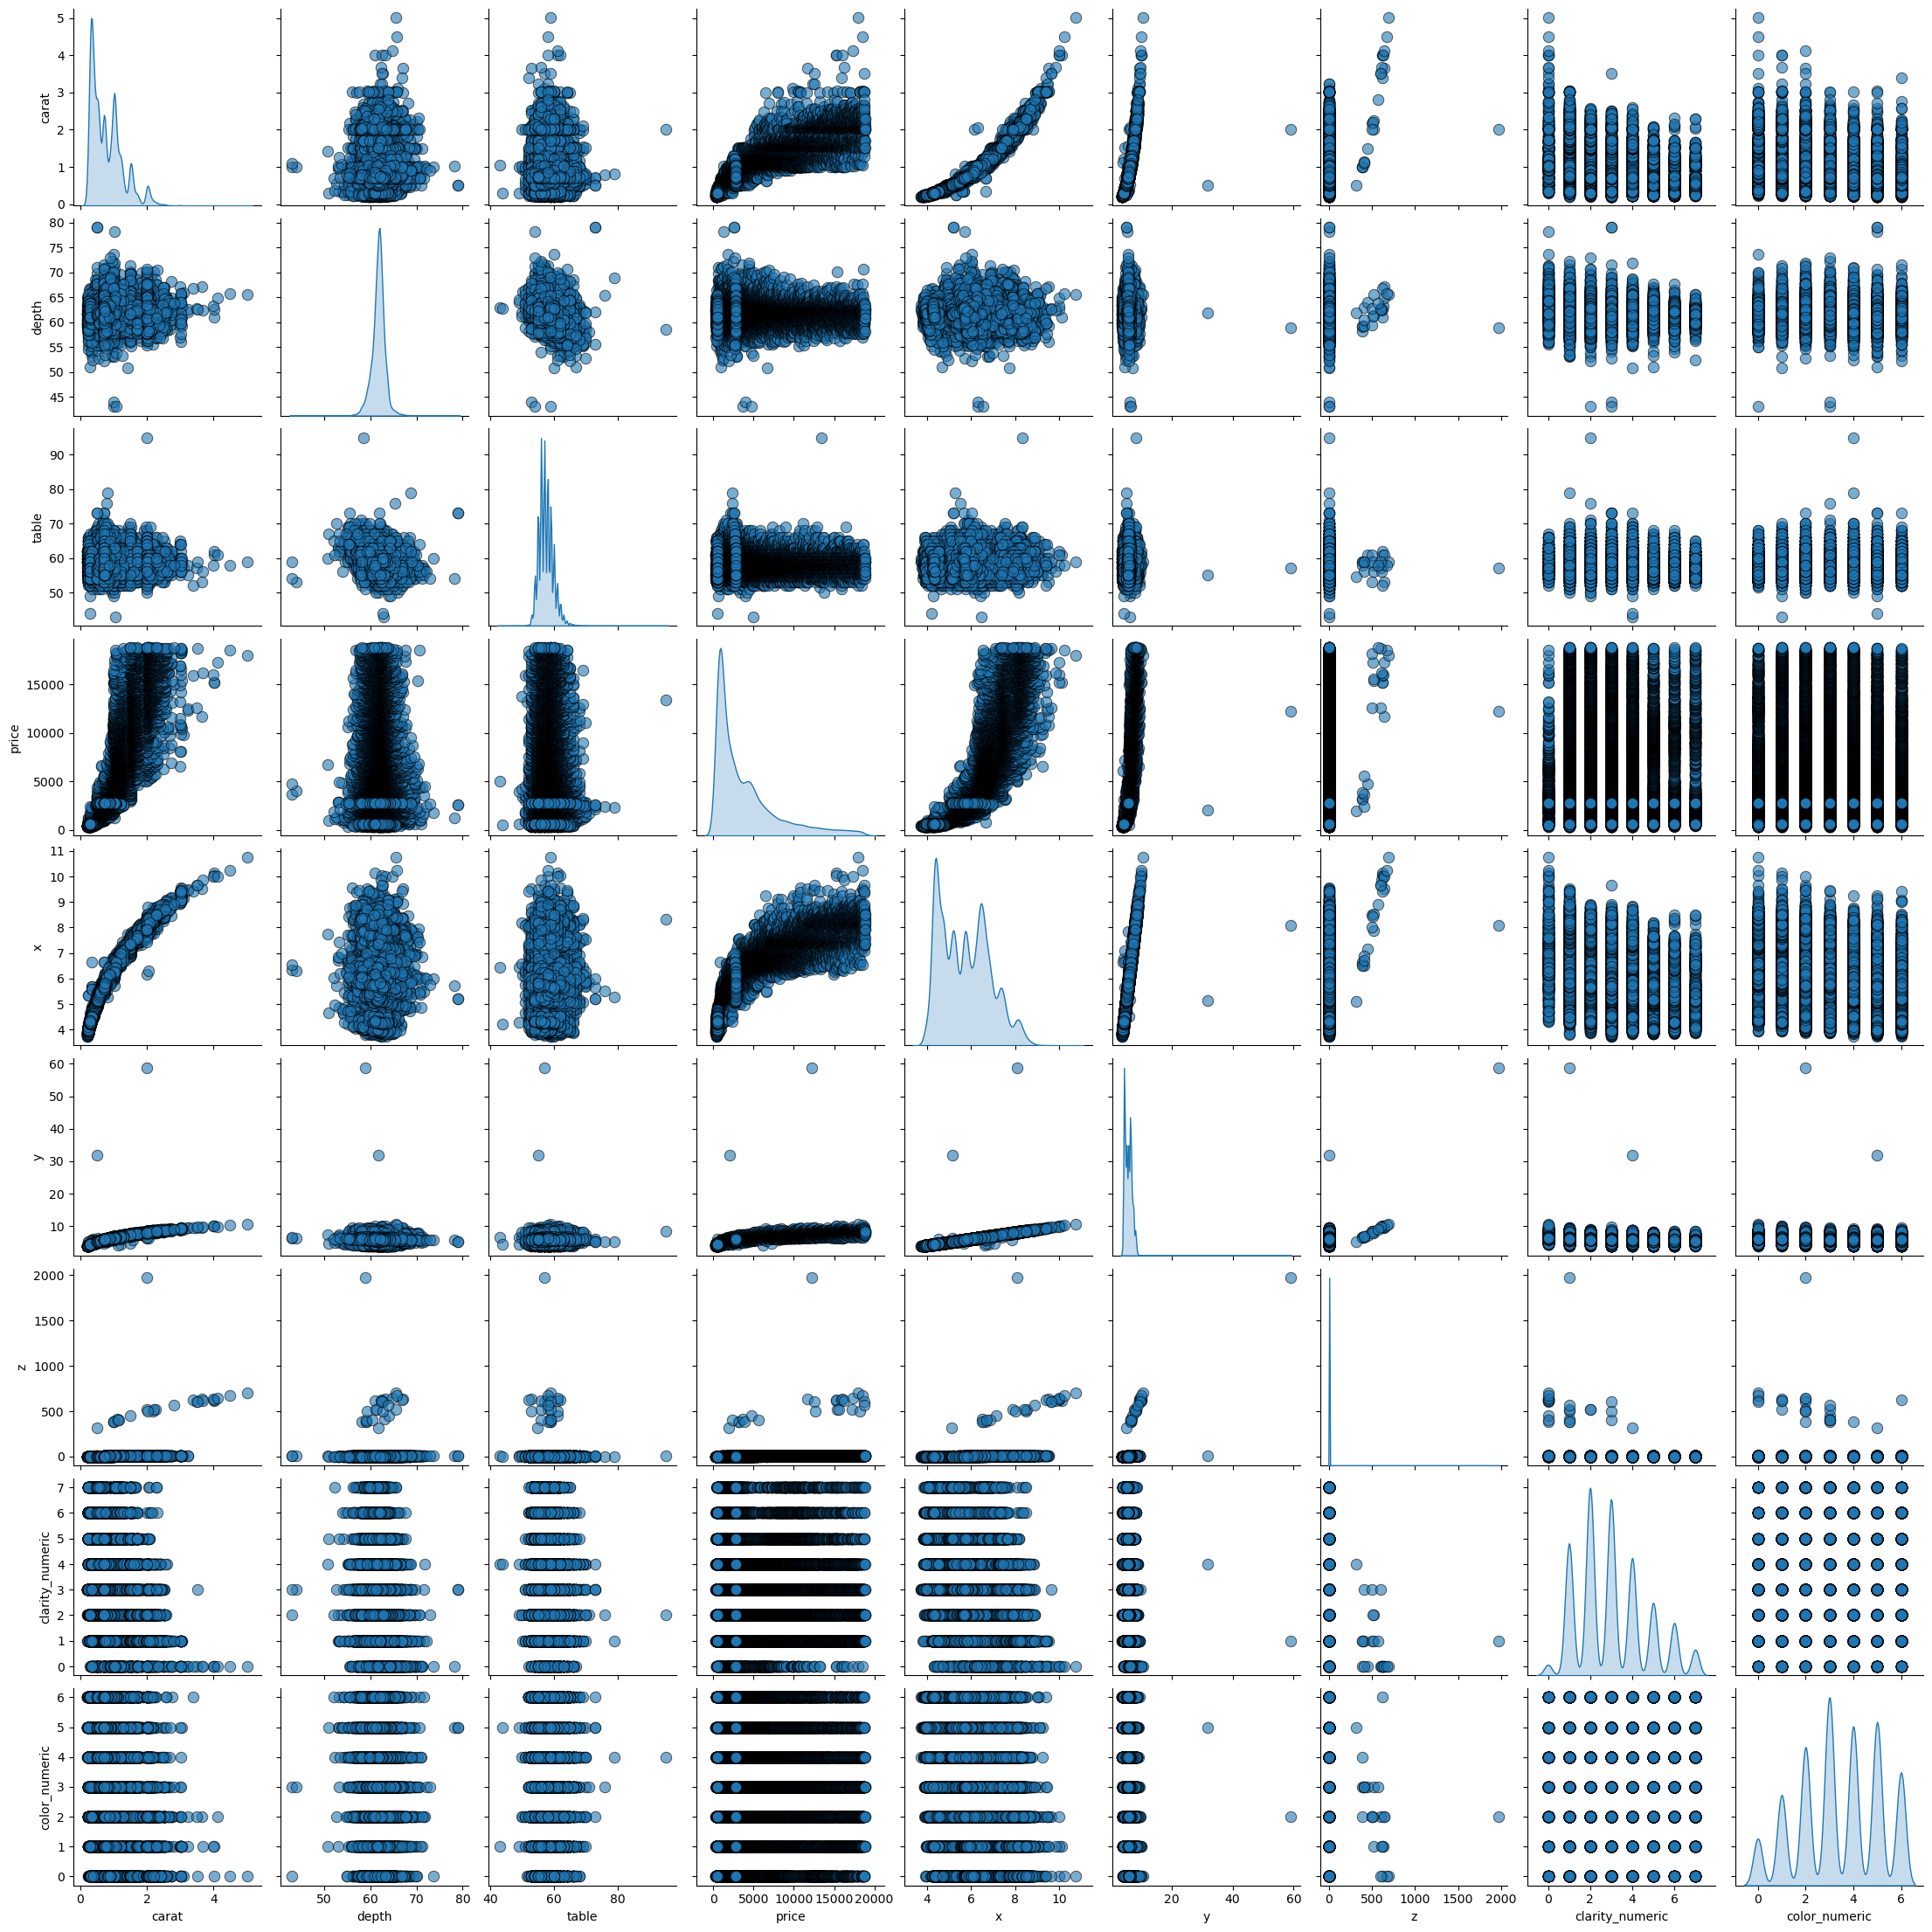

In [17]:
#Run this code
import seaborn as sns
sns.pairplot(df, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [ ]:
#your thoughts here

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

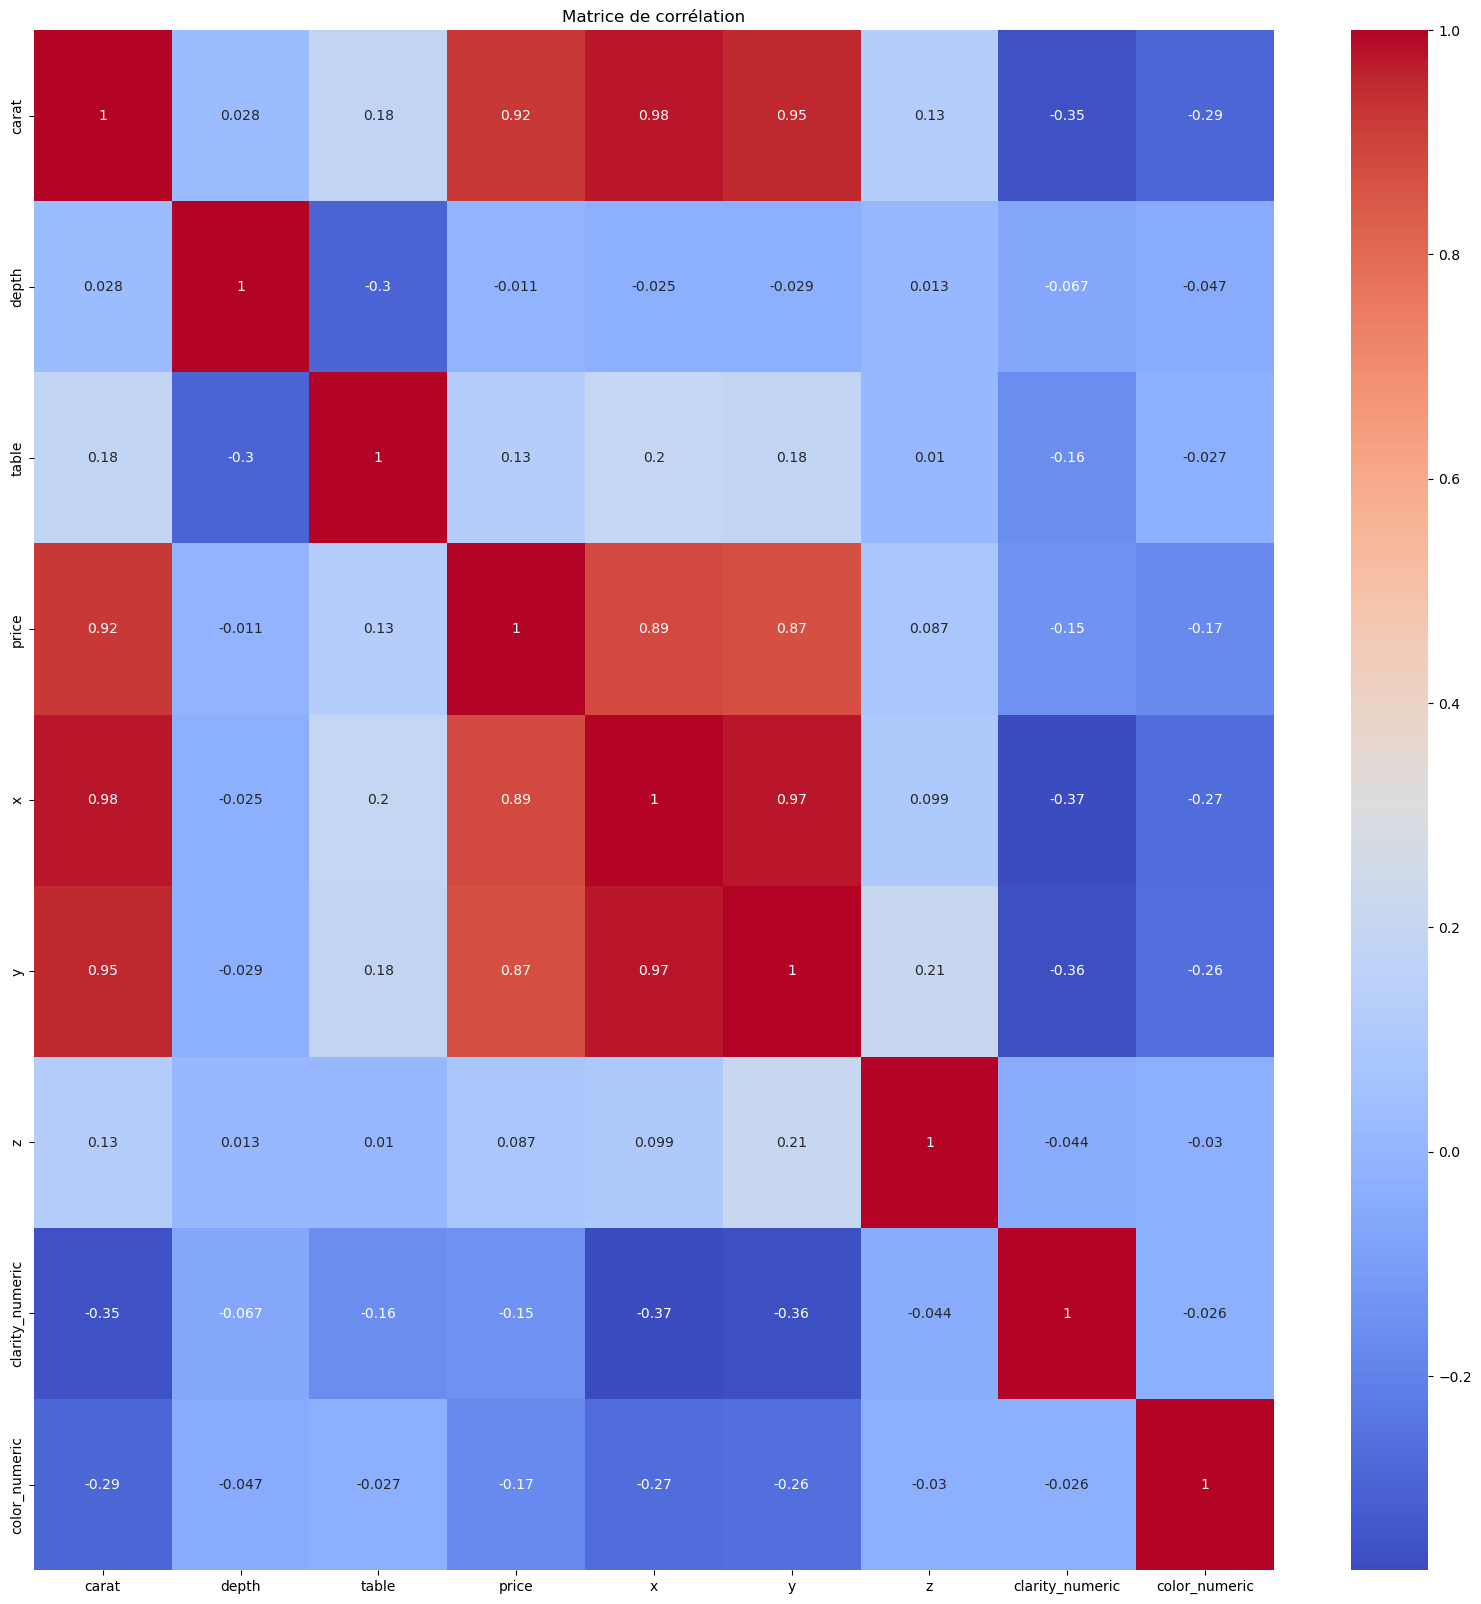

In [20]:
#Run this code
plt.figure(figsize=(20, 20))
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

## 🔍 Que voyez-vous ici ?

**Que remarquez-vous ici ?  
En comparaison avec les résultats précédents, est-ce que cela les confirme ?**


In [27]:
#your thoughts here

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

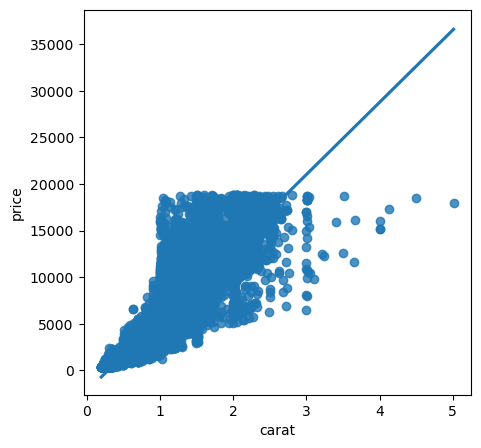

In [24]:
#Run this code
plt.figure(figsize=(5, 5))
sns.regplot(x=df['carat'], y=df['price'], scatter=True)
plt.show()


In [22]:
#Run this code
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df.carat, df.price)
r2 = r_value ** 2
r2

0.8493658995804609

**What do you think?**

In [30]:
#your thoughts here

## 🔍 Vérifications supplémentaires

**Feriez-vous d’autres vérifications sur d’autres variables ?  
Avez-vous des commentaires à formuler concernant `carat` ?**


In [ ]:
#your thoughts here

**Conlcusion**

## ✅ Conclusion finale

**D’après notre jeu de données**, nous pouvons conclure que même si `color` et `clarity` possèdent une classification officielle — et donc une importance théorique — elles n’influencent pas la valeur monétaire d’un diamant de manière déterminante.  
Il est vrai que différentes couleurs ou puretés affichent parfois des écarts de prix, mais en y regardant de plus près, ces variations semblent surtout liées au `carat` (poids) et à ses `dimensions`.  
Dans notre analyse, le facteur clé pour déterminer la valeur d’un diamant reste donc concentré sur ces caractéristiques, comme le montrent les coefficients de corrélation et le coefficient de détermination, qui soulignent clairement leur relation étroite avec le prix.
